## Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from subprocess import check_output
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [2]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
df.shape

(26707, 34)

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [8]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
df.drop(["unique_id"],axis=1,inplace=True)

In [10]:
df.shape

(26707, 33)

In [11]:
df['has_health_insur'] = df['has_health_insur'].replace(np.NaN,0)

### VISUALIZTIONS OF MISSING VALUES

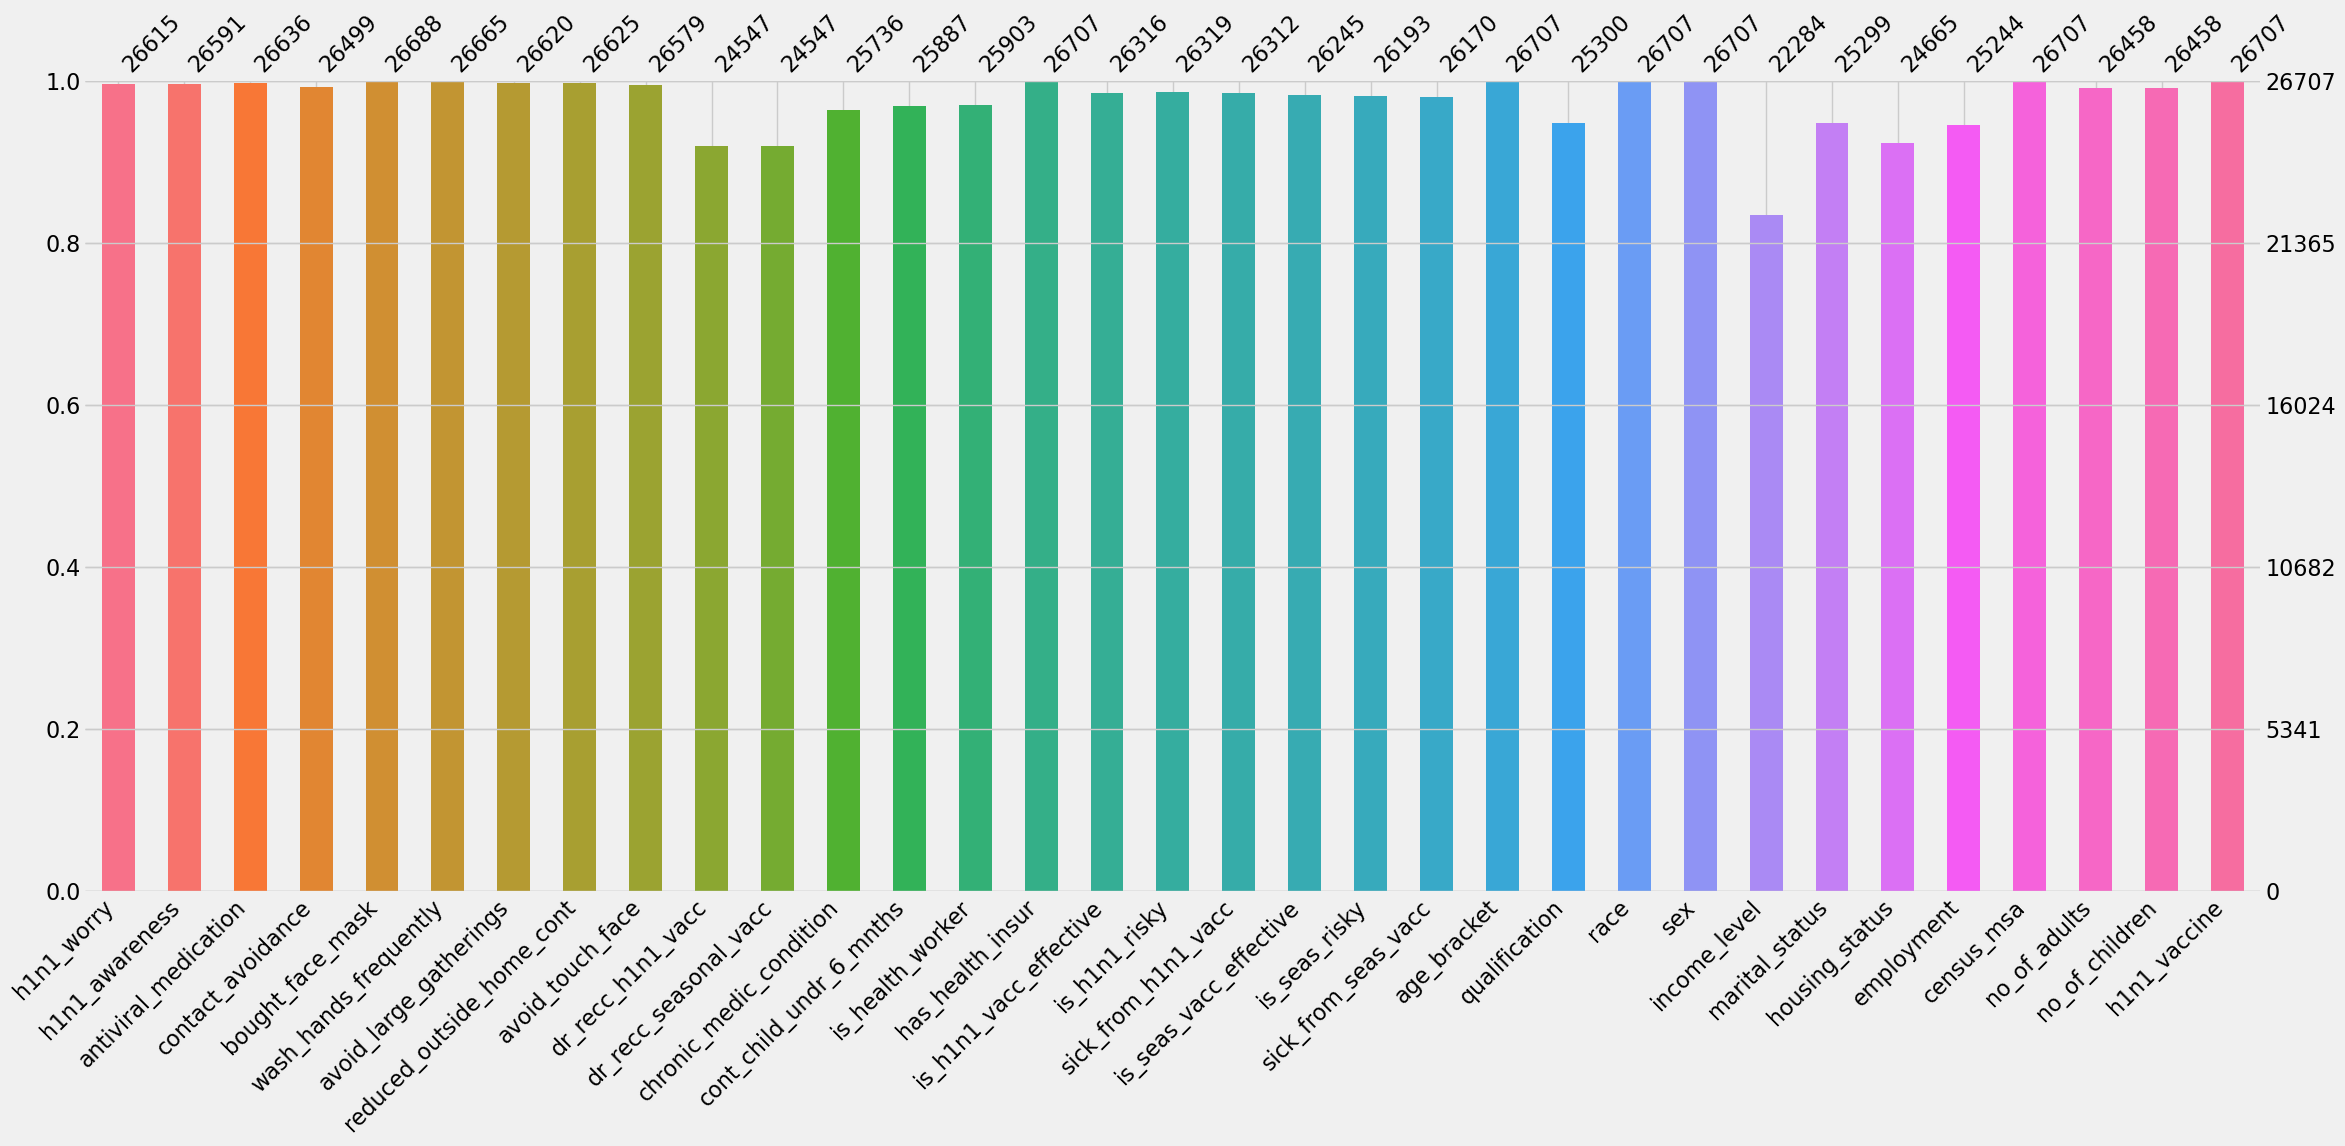

<Figure size 1200x800 with 0 Axes>

In [12]:
color_palette = sns.color_palette("husl", len(df.columns))

msno.bar(df, color=color_palette)


plt.figure(figsize=(12, 8))
plt.tight_layout()


plt.show()

Index(['index', 'missing'], dtype='object')


<Axes: xlabel='missing', ylabel='index'>

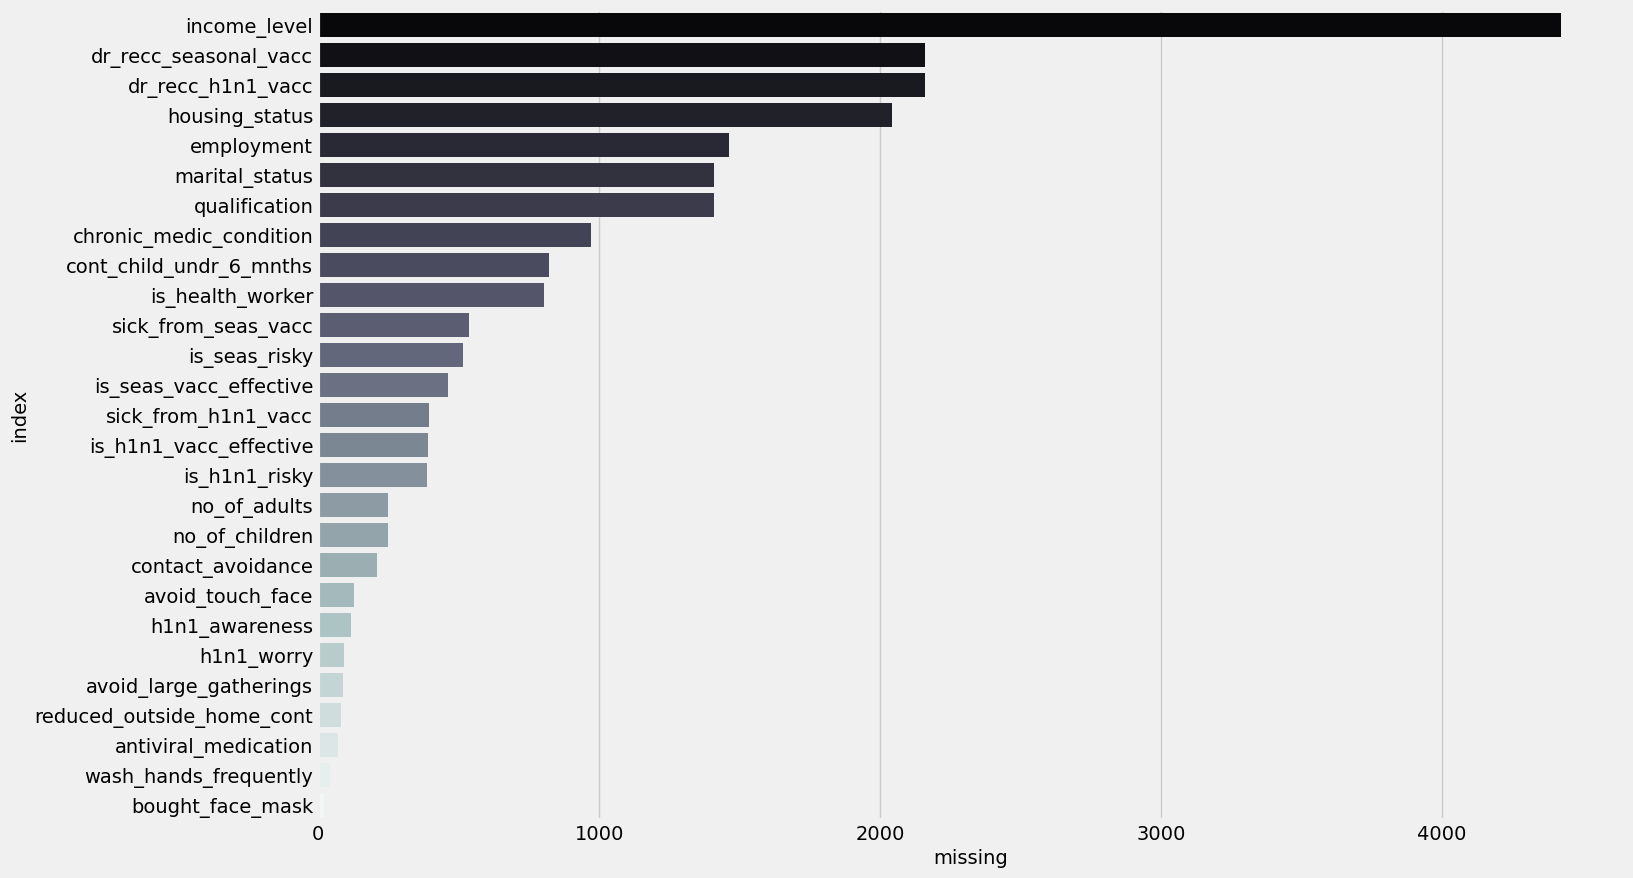

In [13]:
missing = df.isnull().sum()
missing = missing[missing>0]

miss = pd.DataFrame(missing, columns=['missing'])

miss = miss.reset_index()

print(miss.columns)

miss.sort_values(by='missing', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(y = miss['index'], x= miss.missing, palette='bone')

### DATA PREPROCESSING

In [14]:
df["h1n1_worry"].fillna(df["h1n1_worry"].median(),inplace=True)
df["h1n1_awareness"].fillna(df["h1n1_awareness"].median(),inplace=True)
df["antiviral_medication"].fillna(df["antiviral_medication"].median(),inplace=True)
df["contact_avoidance"].fillna(df["contact_avoidance"].median(),inplace=True)
df["bought_face_mask"].fillna(df["bought_face_mask"].median(),inplace=True)
df["wash_hands_frequently"].fillna(df["wash_hands_frequently"].median(),inplace=True)
df["avoid_large_gatherings"].fillna(df["avoid_large_gatherings"].median(),inplace=True)
df["reduced_outside_home_cont"].fillna(df["reduced_outside_home_cont"].median(),inplace=True)
df["avoid_touch_face"].fillna(df["avoid_touch_face"].median(),inplace=True)
df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].median(),inplace=True)
df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].median(),inplace=True)
df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].median(),inplace=True)
df["has_health_insur"].fillna(df["has_health_insur"].median(),inplace=True)
df["is_health_worker"].fillna(df["is_health_worker"].median(),inplace=True)
df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].median(),inplace=True)
df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].median(),inplace=True)
df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].median(),inplace=True)
df["age_bracket"].fillna(df["age_bracket"].mode(),inplace=True)
df["qualification"].fillna(df["qualification"].mode(),inplace=True)
df["race"].fillna(df["race"].mode(),inplace=True)
df["income_level"].fillna(df["income_level"].mode(),inplace=True)
df["marital_status"].fillna(df["marital_status"].mode(),inplace=True)
df["housing_status"].fillna(df["housing_status"].mode(),inplace=True)
df["employment"].fillna(df["employment"].mode(),inplace=True)
df["census_msa"].fillna(df["census_msa"].mode(),inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].median(),inplace=True)
df["no_of_children"].fillna(df["no_of_children"].median(),inplace=True)
df["has_health_insur"] = df["has_health_insur"].replace(np.nan,0)
df['sick_from_h1n1_vacc'] = df['sick_from_h1n1_vacc'].replace(np.NaN,df.sick_from_h1n1_vacc.median())
df['is_seas_vacc_effective'] = df['is_seas_vacc_effective'].replace(np.NaN,df.is_seas_vacc_effective.median())
df['dr_recc_seasonal_vacc'] = df['dr_recc_seasonal_vacc'].replace(np.NaN,df.dr_recc_seasonal_vacc.median())
df['is_seas_risky'] = df['is_seas_risky'].replace(np.NaN,df.is_seas_risky.median())
df['qualification'] = df['qualification'].replace(np.NaN,df.qualification.mode()[0])
df['income_level'] = df['income_level'].replace(np.NaN,df.income_level.mode()[0])
df['marital_status'] = df['marital_status'].replace(np.NaN,df.marital_status.mode()[0])
df['housing_status'] = df['housing_status'].replace(np.NaN,df.housing_status.mode()[0])
df['employment'] = df['employment'].replace(np.NaN,df.employment.mode()[0])

In [15]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [16]:
df=df.drop_duplicates()
df.shape

(26697, 33)

### VISUALIZATIONS

In [17]:
numeric_col=[feature for feature in df if df[feature].dtype!='O']

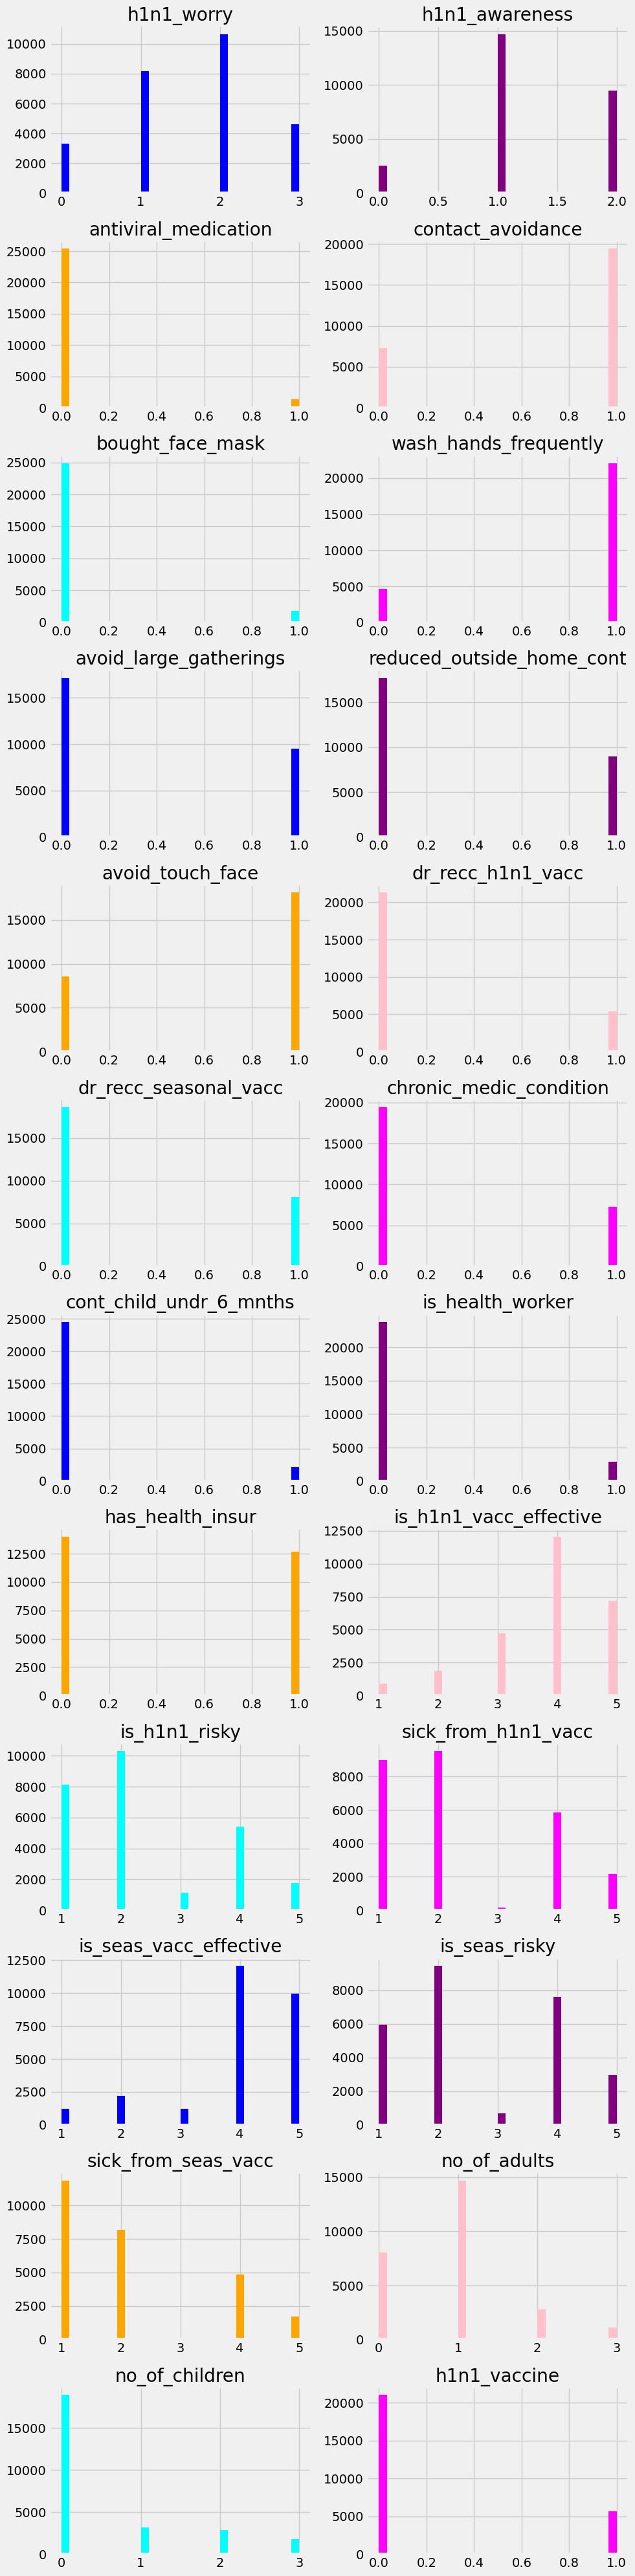

In [18]:
import itertools

plt.figure(figsize=(10, 40))
color_palette = itertools.cycle(['blue', 'purple', 'orange', 'pink', 'cyan', 'magenta'])
num_cols = len(numeric_col)
num_rows = (num_cols + 1) // 2

for i, col in enumerate(numeric_col):
    plt.subplot(num_rows, 2, i + 1)
    plt.hist(df[col], bins=30, color=next(color_palette))
    plt.title(col)

plt.tight_layout(pad=1.0)
plt.show()

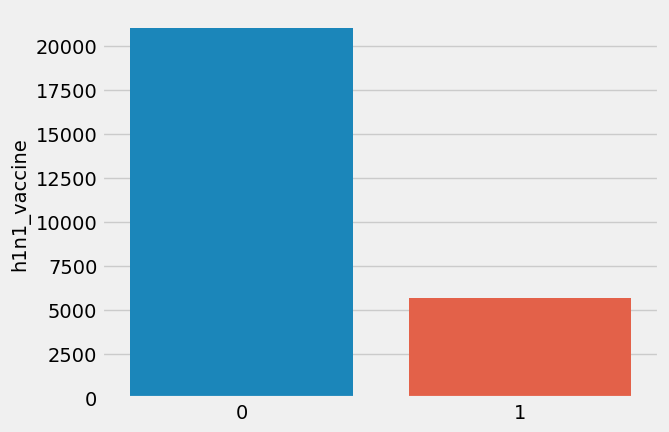

In [19]:
h1n1_vaccine_counts = df['h1n1_vaccine'].value_counts()

sns.barplot(x=h1n1_vaccine_counts.index, y=h1n1_vaccine_counts)
plt.show()

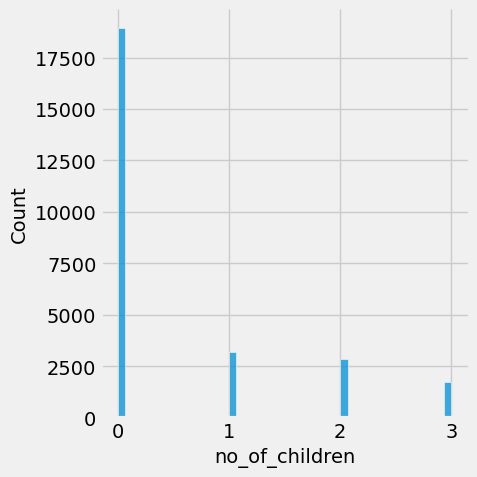

In [20]:
sns.displot(df.no_of_children)

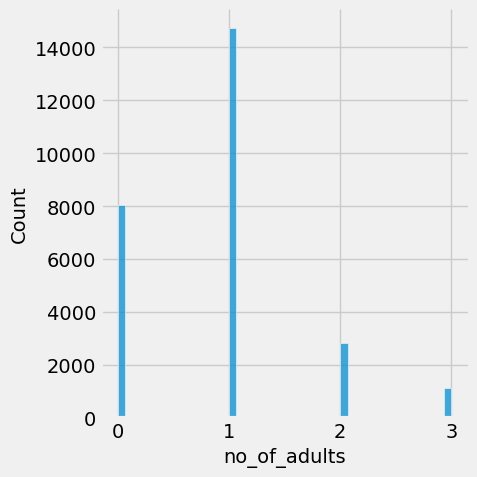

In [21]:
sns.displot(df.no_of_adults)

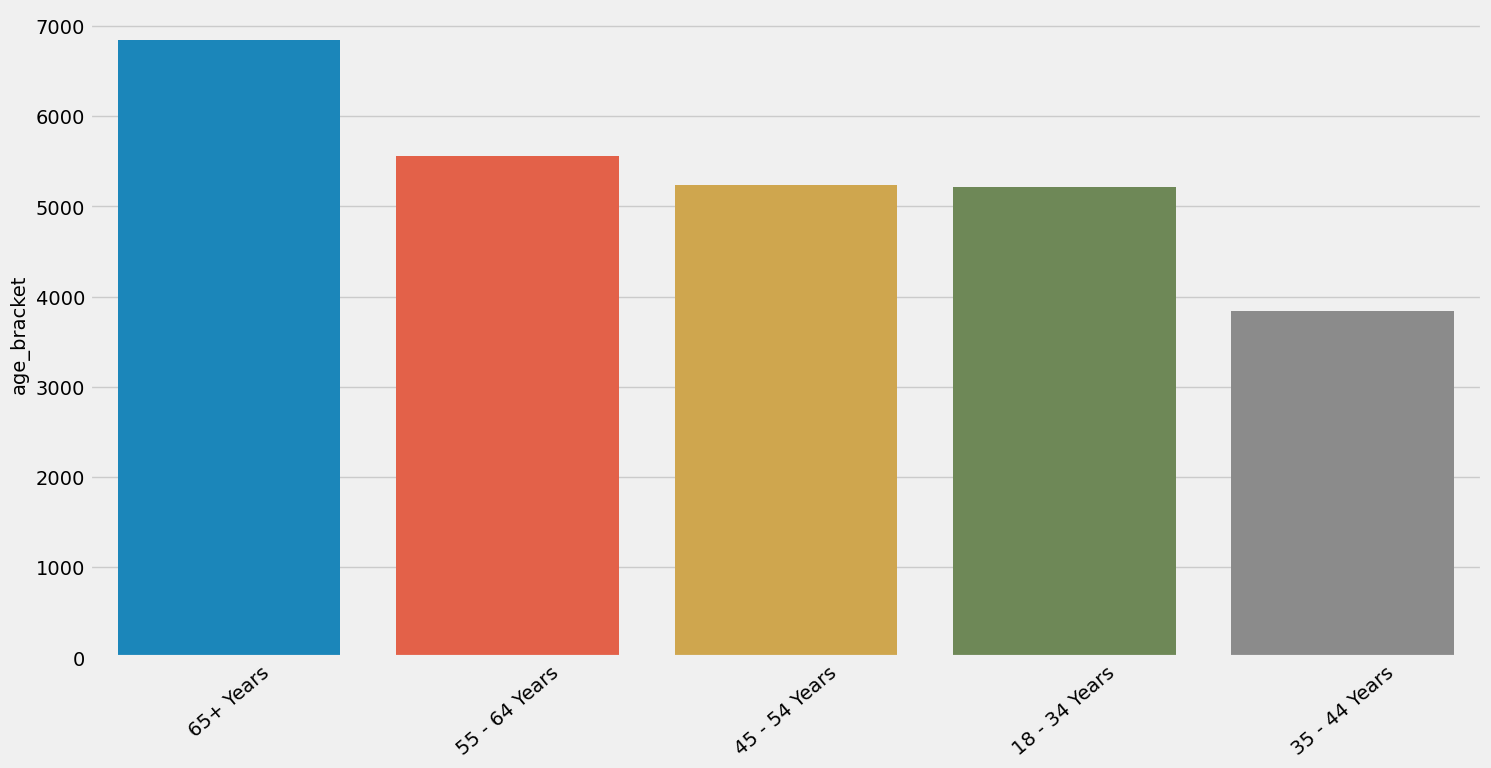

In [22]:
top_20_locations = df['age_bracket'].value_counts()[:20]
plt.figure(figsize=(16,8))
sns.barplot(x=top_20_locations.index, y=top_20_locations)
plt.xticks(rotation=40)
plt.show()

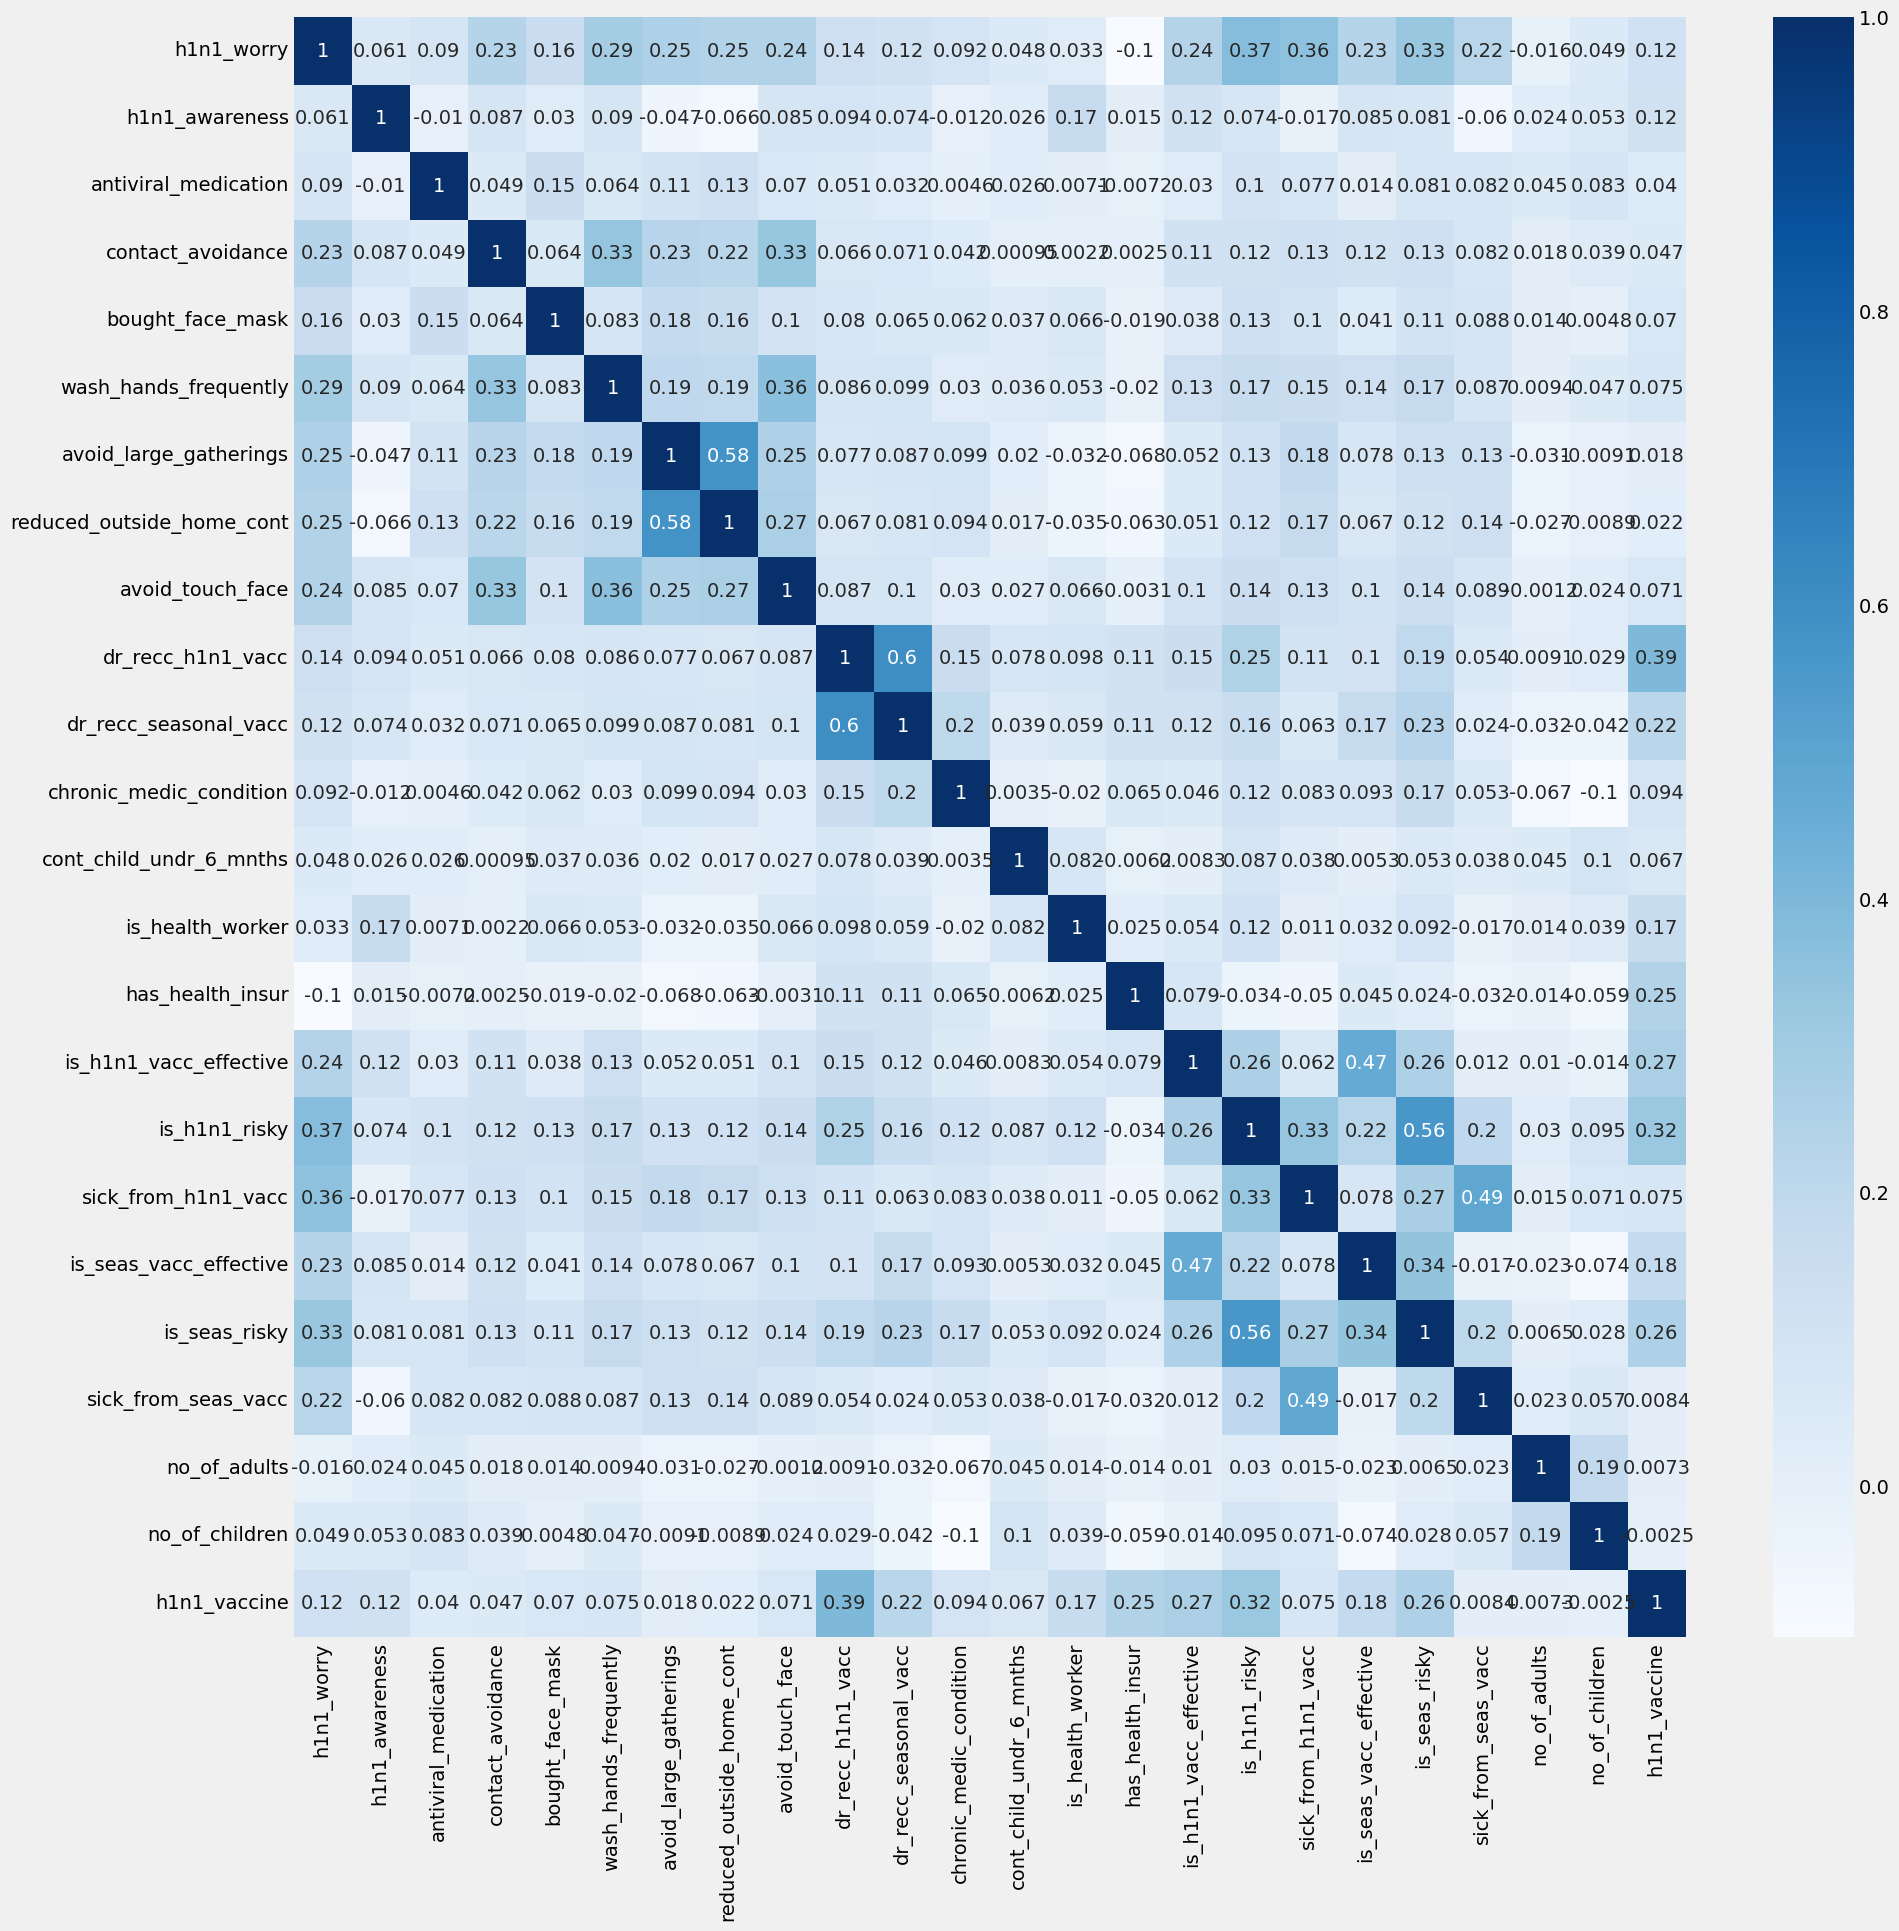

In [23]:
corrmat = df.corr()
top_corr_df = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_df].corr(),annot=True,cmap="Blues")

### Get dummies for Models

In [24]:
cols = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc','no_of_adults', 'no_of_children']

for i in cols:
    df[i] = df[i].astype(str)

In [25]:
df = pd.get_dummies(df)

In [26]:
x=df.drop(["h1n1_vaccine"],axis=1)
y=df[["h1n1_vaccine"]]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

## LOGISTIC REGRESSION


In [28]:
model_1= LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression()

In [30]:
model_1.score(X_train,y_train)

0.8517150960560818

In [31]:
model_1.score(X_test,y_test)

0.8478152309612984

## SVC

In [32]:
from sklearn.svm import SVC

In [33]:
model_2 = SVC(kernel = 'rbf',C = 2.0)
model_2.fit(X_train,y_train)

SVC(C=2.0)

In [34]:
model_2.score(X_train,y_train)

0.8968801840851929

In [35]:
model_2.score(X_test,y_test)

0.8493133583021224

## KNEIGHBORS CLASSIFIER


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model_3 = KNeighborsClassifier(n_neighbors = 7)
model_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
model_3.score(X_train,y_train)

0.8607588162893991

In [39]:
model_3.score(X_test,y_test)

0.8307116104868913

## DECISION TREE CLASSIFIER


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model_4 = DecisionTreeClassifier(max_depth=9)
model_4.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=9)

In [42]:
model_4.score(X_train,y_train)

0.8763311392946969

In [43]:
model_4.score(X_test,y_test)

0.831585518102372

## BAGGING CLASSIFIER

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
model_5 = BaggingClassifier(n_estimators=25,base_estimator=model_4)
model_5.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                  n_estimators=25)

In [46]:
model_5.score(X_train,y_train)

0.8921175148498957

In [47]:
model_5.score(X_test,y_test)


0.8466916354556804

## AdaBoostClassifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier


In [49]:
model_6 = AdaBoostClassifier(n_estimators = 100)
model_6.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100)

In [50]:
model_6.score(X_train,y_train)

0.8494675442821212

In [51]:
model_6.score(X_test,y_test)


0.8471910112359551

## GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
model_7 = GradientBoostingClassifier(n_estimators = 150)
model_7.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [54]:
model_7.score(X_train,y_train)

0.8615080002140526

In [55]:
model_7.score(X_test,y_test)

0.8526841448189763

## RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model_8 = RandomForestClassifier(n_estimators=8,max_features=11,max_depth = 8)
model_8.fit(X_train,y_train)


RandomForestClassifier(max_depth=8, max_features=11, n_estimators=8)

In [58]:
model_8.score(X_train,y_train)

0.8580296462781613

In [59]:
model_8.score(X_test,y_test)

0.8455680399500625

## GaussianNB

In [60]:
from sklearn.naive_bayes import GaussianNB


In [61]:
model_9 = GaussianNB()
model_9.fit(X_train, y_train)

GaussianNB()

In [62]:
model_9.score(X_train,y_train)

0.7134371488200353

In [63]:
model_9.score(X_test,y_test)

0.7138576779026217

## confusion metrics

In [65]:
predictions=model_1.predict(X_test)

In [66]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,predictions)

0.8478152309612984

<Axes: >

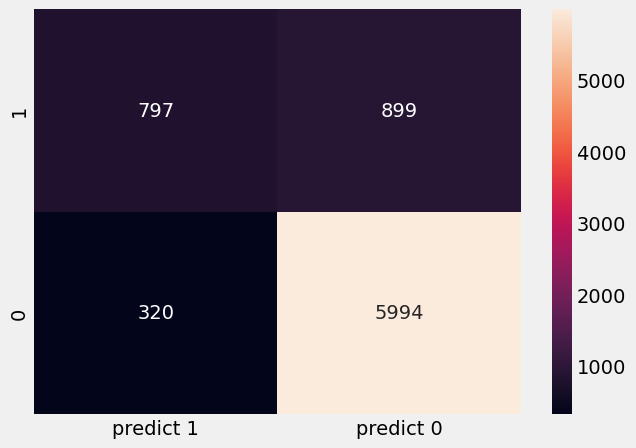

In [68]:
cm = metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm,index =[i for i in ["1","0"]],columns = [i for i in ["predict 1","predict 0"]])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm,annot = True ,fmt ="g")